##### Import Libraries

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

##### Import Origional Microarray Expression Data

In [47]:
# Define the base directory relative to the current working directory
base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

# Define the paths to the data files
control_samples_path = os.path.join(base_dir, 'data', 'control', 'control_samples.csv')
stage_1_samples_path = os.path.join(base_dir, 'data', 'cancer', 'stage_1_prostate_cancer_samples.csv')
stage_2_samples_path = os.path.join(base_dir, 'data', 'cancer', 'stage_2_prostate_cancer_samples.csv')
stage_3_samples_path = os.path.join(base_dir, 'data', 'cancer', 'stage_3_prostate_cancer_samples.csv')
stage_4_samples_path = os.path.join(base_dir, 'data', 'cancer', 'stage_4_prostate_cancer_samples.csv')

# Load and prepare the original stage data
ctl_samples = pd.read_csv(control_samples_path)
stage_1_samples = pd.read_csv(stage_1_samples_path)
stage_2_samples = pd.read_csv(stage_2_samples_path)
stage_3_samples = pd.read_csv(stage_3_samples_path)
stage_4_samples = pd.read_csv(stage_4_samples_path)

# Add stage column for easier concatenation
ctl_samples['Stage'] = 'Control'
stage_1_samples['Stage'] = 'Stage 1'
stage_2_samples['Stage'] = 'Stage 2'
stage_3_samples['Stage'] = 'Stage 3'
stage_4_samples['Stage'] = 'Stage 4'

# Combine all stages data
combined_data = pd.concat([ctl_samples, stage_1_samples, stage_2_samples, stage_3_samples, stage_4_samples], ignore_index=True)

In [48]:
# Define the miRNA biomarkers
ctl_s1_biomarkers = ['hsa-miR-4783-3p', 'hsa-miR-1307-3p', 'hsa-miR-6131', 'hsa-miR-6090']
s1_s2_biomarkers = ['hsa-miR-3178', 'hsa-miR-6857-3p', 'hsa-miR-4749-5p', 'hsa-miR-4462']
s2_s3_biomarkers = ['hsa-miR-6722-3p', 'hsa-miR-3130-3p', 'hsa-miR-1229-3p']
s3_s4_biomarkers = ['hsa-miR-4511', 'hsa-miR-6715b-5p', 'hsa-miR-139-3p', 'hsa-miR-3975']

all_biomarkers = ctl_s1_biomarkers + s1_s2_biomarkers + s2_s3_biomarkers + s3_s4_biomarkers

# Ensure only numeric columns are used for miRNA expression
miRNA_expression_data = combined_data[['Stage'] + all_biomarkers]

In [49]:
# Group by stage and calculate the mean expression for each miRNA
mean_expression = miRNA_expression_data.groupby('Stage').mean().T

# Normalize each miRNA across stages
normalized_expression = mean_expression.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

<Figure size 2000x2000 with 0 Axes>

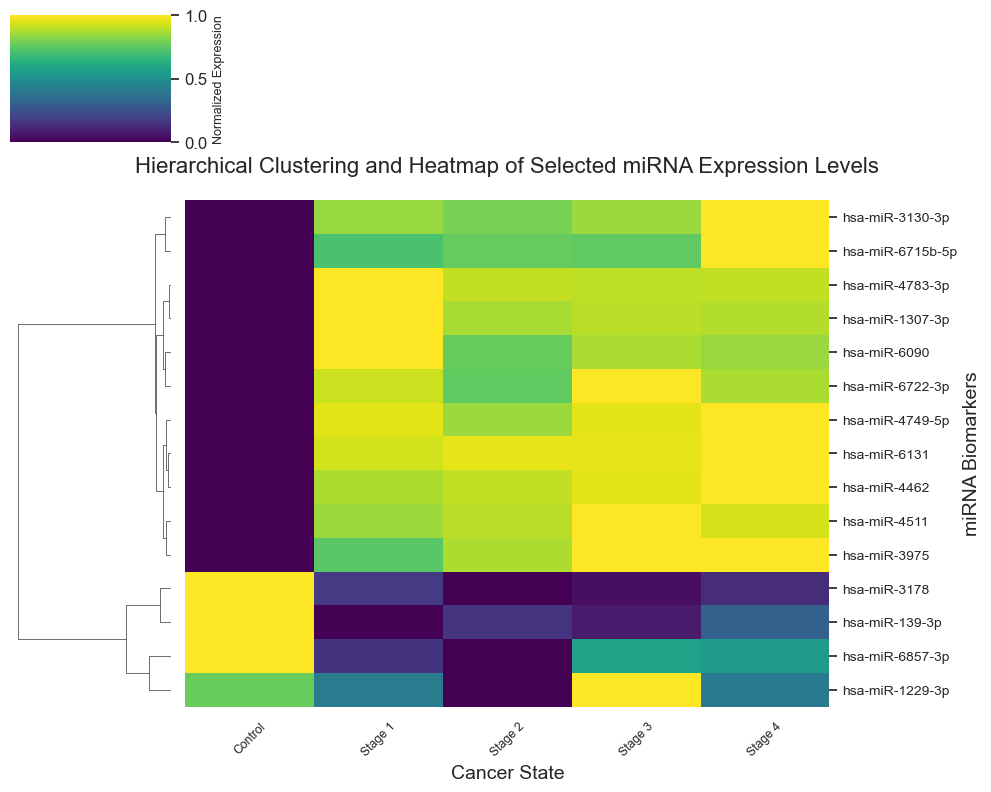

In [50]:
# Perform hierarchical clustering on the normalized data
linked = linkage(normalized_expression, method='ward')

# Create a heatmap with dendrogram
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)  # Adjust font scale for better visibility
clustermap = sns.clustermap(normalized_expression, row_linkage=linked, col_cluster=False, cmap='viridis', figsize=(10, 8))

# Enhance the heatmap
clustermap.ax_heatmap.set_title('Hierarchical Clustering and Heatmap of Selected miRNA Expression Levels', fontsize=16, pad=20)
clustermap.ax_heatmap.set_xlabel('Cancer State', fontsize=14)
clustermap.ax_heatmap.set_ylabel('miRNA Biomarkers', fontsize=14)
clustermap.ax_heatmap.tick_params(axis='x', rotation=45)

# Set y-tick labels to ensure all miRNAs are displayed
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)  # Adjust fontsize for y-tick labels

# Add color bar legend with a title
cbar = clustermap.ax_heatmap.collections[0].colorbar
cbar.set_label('Normalized Expression', fontsize=9)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

ANOVA result for hsa-miR-6756-5p: F=347.2806181284206, p=3.862864849567393e-271
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Control Stage 1   -0.189    0.0 -0.2068 -0.1712   True
Control Stage 2    0.027    0.0   0.015   0.039   True
Control Stage 3   -0.094    0.0 -0.1131  -0.075   True
Control Stage 4  -0.1668    0.0 -0.1912 -0.1424   True
Stage 1 Stage 2    0.216    0.0   0.195   0.237   True
Stage 1 Stage 3    0.095    0.0  0.0693  0.1207   True
Stage 1 Stage 4   0.0222 0.2521 -0.0077  0.0521  False
Stage 2 Stage 3   -0.121    0.0 -0.1431 -0.0989   True
Stage 2 Stage 4  -0.1938    0.0 -0.2206  -0.167   True
Stage 3 Stage 4  -0.0728    0.0 -0.1034 -0.0421   True
------------------------------------------------------


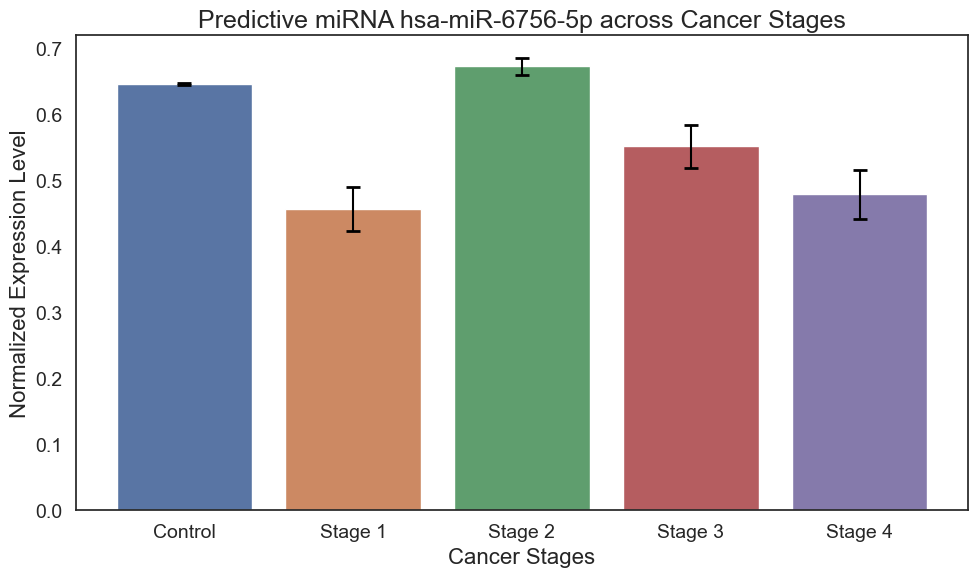

ANOVA result for hsa-miR-139-3p: F=66.9686681639766, p=1.3192536186633435e-55
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Control Stage 1    0.057    0.0   0.034  0.0801   True
Control Stage 2  -0.0717    0.0 -0.0872 -0.0561   True
Control Stage 3   0.0469    0.0  0.0222  0.0716   True
Control Stage 4    0.057    0.0  0.0255  0.0886   True
Stage 1 Stage 2  -0.1287    0.0  -0.156 -0.1015   True
Stage 1 Stage 3  -0.0102 0.9209 -0.0435  0.0232  False
Stage 1 Stage 4     -0.0    1.0 -0.0387  0.0387  False
Stage 2 Stage 3   0.1186    0.0  0.0899  0.1472   True
Stage 2 Stage 4   0.1287    0.0   0.094  0.1635   True
Stage 3 Stage 4   0.0102 0.9569 -0.0295  0.0499  False
------------------------------------------------------


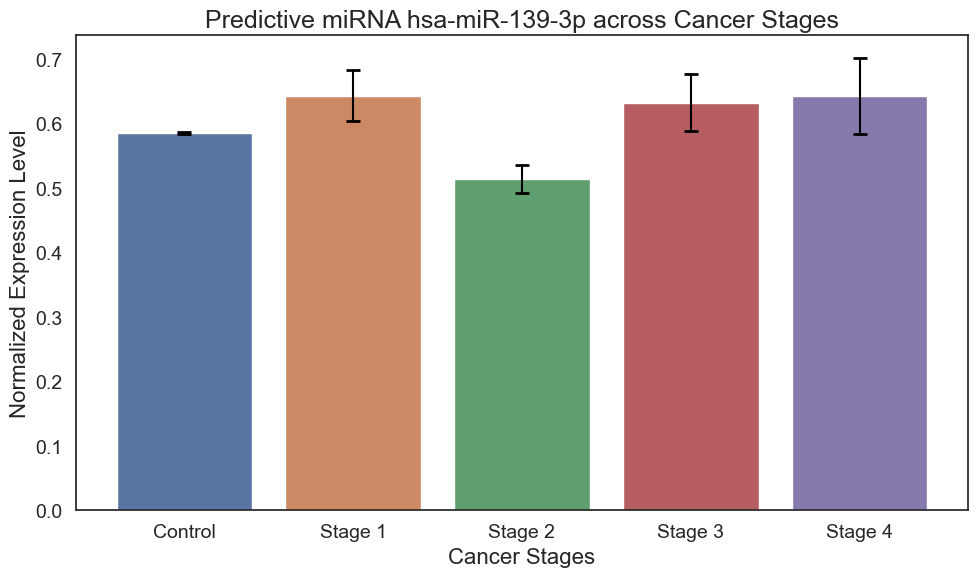

ANOVA result for hsa-miR-548h-5p: F=57.83022799836763, p=5.025816685615528e-48
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Control Stage 1   0.1093    0.0  0.0783  0.1403   True
Control Stage 2   0.0445    0.0  0.0236  0.0654   True
Control Stage 3   0.1169    0.0  0.0837  0.1502   True
Control Stage 4   0.0887    0.0  0.0462  0.1312   True
Stage 1 Stage 2  -0.0647    0.0 -0.1014 -0.0281   True
Stage 1 Stage 3   0.0077 0.9903 -0.0372  0.0525  False
Stage 1 Stage 4  -0.0206 0.8176 -0.0726  0.0315  False
Stage 2 Stage 3   0.0724    0.0  0.0339   0.111   True
Stage 2 Stage 4   0.0442 0.0743 -0.0026  0.0909  False
Stage 3 Stage 4  -0.0282 0.5998 -0.0816  0.0252  False
------------------------------------------------------


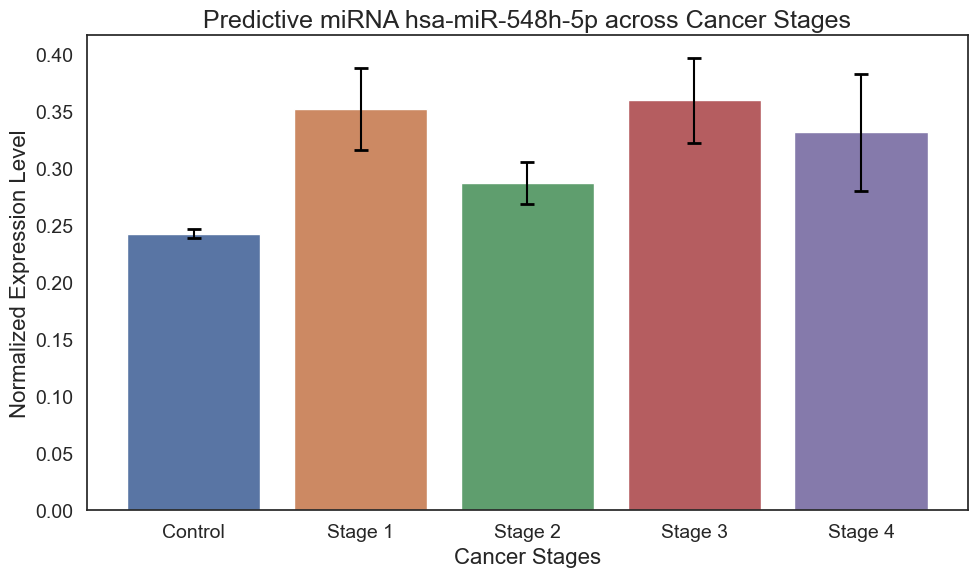

In [51]:
predictive_miRNAs = ['hsa-miR-6756-5p', 'hsa-miR-139-3p', 'hsa-miR-548h-5p']

# Function to perform ANOVA and Post Hoc analysis
def perform_anova_posthoc(miRNA_list, title_prefix):
    sns.set_style("white")

    plt.rc('axes', titlesize=18)     # fontsize of the axes title
    plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
    plt.rc('legend', fontsize=14)    # legend fontsize
    plt.rc('font', size=14)     

    for miRNA in miRNA_list:
        miRNA_data = combined_data[['Stage', miRNA]]
        miRNA_data = miRNA_data.dropna()

        # Normalize within each miRNA across all stages
        miRNA_data['Normalized'] = miRNA_data.groupby('Stage')[miRNA].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # ANOVA on normalized data
        anova_result = f_oneway(
            miRNA_data[miRNA_data['Stage'] == 'Control']['Normalized'],
            miRNA_data[miRNA_data['Stage'] == 'Stage 1']['Normalized'],
            miRNA_data[miRNA_data['Stage'] == 'Stage 2']['Normalized'],
            miRNA_data[miRNA_data['Stage'] == 'Stage 3']['Normalized'],
            miRNA_data[miRNA_data['Stage'] == 'Stage 4']['Normalized']
        )

        print(f"ANOVA result for {miRNA}: F={anova_result.statistic}, p={anova_result.pvalue}")

        # Post Hoc Analysis with Tukey HSD on normalized data
        tukey_result = pairwise_tukeyhsd(endog=miRNA_data['Normalized'], groups=miRNA_data['Stage'], alpha=0.05)
        print(tukey_result)

        mean_data = miRNA_data.groupby('Stage')['Normalized'].mean().reset_index()
        sem_data = miRNA_data.groupby('Stage')['Normalized'].sem().reset_index()
        mean_data['2*SEM'] = 2 * sem_data['Normalized']

        # Plot normalized expression over groups using bar plot
        plt.figure(figsize=(10, 6))
        bar_plot = sns.barplot(x='Stage', y='Normalized', data=mean_data)
        
        # Add error bars with horizontal caps
        for i, stage in enumerate(mean_data['Stage']):
            plt.errorbar(x=i, y=mean_data.loc[i, 'Normalized'], yerr=mean_data.loc[i, '2*SEM'], fmt='none', c='black', capsize=5, capthick=2)

        plt.title(f'{title_prefix} {miRNA} across Cancer Stages')
        plt.xlabel('Cancer Stages')
        plt.ylabel('Normalized Expression Level')
        plt.tight_layout()
        plt.show()

# Perform analysis for predictive miRNAs
perform_anova_posthoc(predictive_miRNAs, "Predictive miRNA")

#  GET AYUB FOR THIS PART
# # List of miRNA biomarkers connected to diseases in the literature
# disease_related_miRNAs = ['hsa-miR-1307-3p', 'hsa-miR-3130-3p']  # Replace with your actual list

# # Perform analysis for disease-related miRNAs
# perform_anova_posthoc(disease_related_miRNAs, "Disease-related miRNA")
